In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from datetime import timedelta

# Obtener datos históricos de BTC/USDT desde Yahoo Finance
ticker = "BTC-USD"
df = yf.download(ticker, start="2015-01-01", end="2024-05-27")

# Seleccionar solo la columna 'Close' y resetear el índice
df = df[['Close']].reset_index()

# Crear características para el modelo
def create_features(df):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    return df

df = create_features(df)
df

[*********************100%%**********************]  1 of 1 completed


,Date,Close,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear
0,2015-01-01,314.248993,1,1,2015,3,1,1
1,2015-01-02,315.032013,2,1,2015,4,2,1
2,2015-01-03,281.082001,3,1,2015,5,3,1
3,2015-01-04,264.195007,4,1,2015,6,4,1
4,2015-01-05,274.473999,5,1,2015,0,5,2
...,...,...,...,...,...,...,...,...
3429,2024-05-22,69122.335938,22,5,2024,2,143,21
3430,2024-05-23,67929.562500,23,5,2024,3,144,21
3431,2024-05-24,68526.101562,24,5,2024,4,145,21
3432,2024-05-25,69265.945312,25,5,2024,5,146,21


c:\Users\lufer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


RMSE: 54.19719126683382


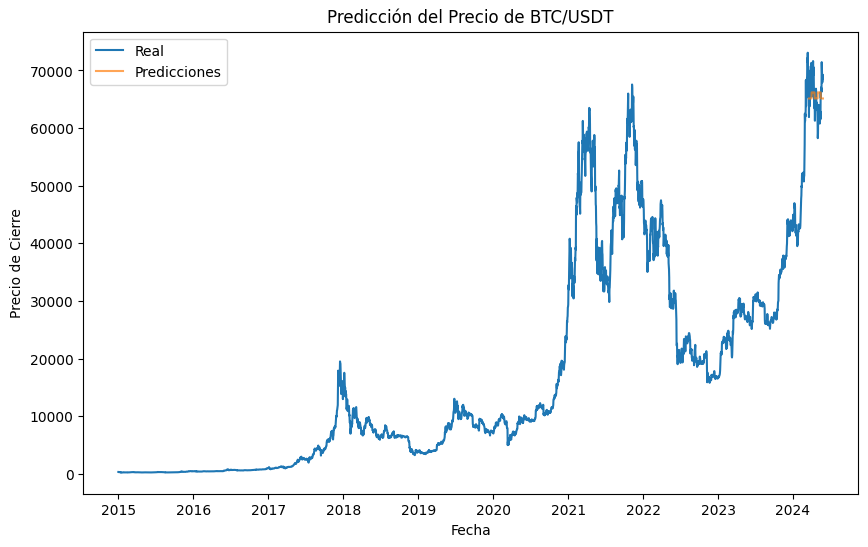

Predicciones para los próximos 10 días: [65140.01 65140.01 65140.01 65140.01 65140.01 66198.28 66198.28 66198.28
 66198.28 66198.28]


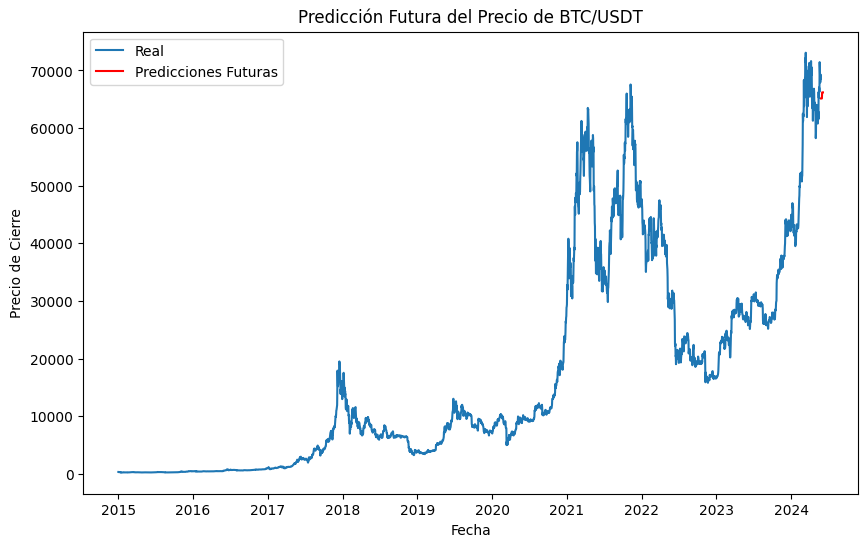

In [14]:

# Definir características y etiqueta
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayOfYear', 'WeekOfYear']
target = 'Close'

# Dividir los datos en entrenamiento y prueba
train_size = int(len(df) * 0.98)
train, test = df[:train_size], df[train_size:]

# Entrenar el modelo
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

# Hacer predicciones
predictions = model.predict(X_test)

# Evaluar el modelo RMSE
rmse = np.sqrt(mean_absolute_error(y_test, predictions))
print(f'RMSE: {rmse}')

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Real')
plt.plot(test['Date'], predictions, label='Predicciones', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicción del Precio de BTC/USDT')
plt.legend()
plt.show()

# Predicción a futuro (10 días)
last_date = df['Date'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 11)]
future_df = pd.DataFrame(future_dates, columns=['Date'])
future_df = create_features(future_df)

future_predictions = model.predict(future_df[features])
print(f'Predicciones para los próximos 10 días: {future_predictions}')

# Visualizar predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Real')
plt.plot(future_df['Date'], future_predictions, label='Predicciones Futuras', color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicción Futura del Precio de BTC/USDT')
plt.legend()
plt.show()
